In [70]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as m


In [71]:
file_path = '/Users/imee/Desktop/IVAN/amazon.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
print(df.head(10), '\n')
print(df.tail(10))

   year state    month  number        date
0  1998  Acre  Janeiro     0.0  1998-01-01
1  1999  Acre  Janeiro     0.0  1999-01-01
2  2000  Acre  Janeiro     0.0  2000-01-01
3  2001  Acre  Janeiro     0.0  2001-01-01
4  2002  Acre  Janeiro     0.0  2002-01-01
5  2003  Acre  Janeiro    10.0  2003-01-01
6  2004  Acre  Janeiro     0.0  2004-01-01
7  2005  Acre  Janeiro    12.0  2005-01-01
8  2006  Acre  Janeiro     4.0  2006-01-01
9  2007  Acre  Janeiro     0.0  2007-01-01 

      year      state     month  number        date
6444  2007  Tocantins  Dezembro    13.0  2007-01-01
6445  2008  Tocantins  Dezembro     7.0  2008-01-01
6446  2009  Tocantins  Dezembro    46.0  2009-01-01
6447  2010  Tocantins  Dezembro    72.0  2010-01-01
6448  2011  Tocantins  Dezembro   105.0  2011-01-01
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453 

In [72]:
df.tail(10)
print(df.shape[0])
print(df.shape[1])

6454
5


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [74]:
df[~df.duplicated()]
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [75]:
month_map = {
    "Janeiro": "January",
    "Fevereiro": "February",
    "Marco": "March",
    "Abril": "April",
    "Maio": "May",
    "Junho": "June",
    "Julho": "July",
    "Agosto": "August",
    "Setembro": "September",
    "Outubro": "October",
    "Novembro": "November",
    "Dezembro": "December"
}
df["month"] = df["month"].map(month_map)
df

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01


In [76]:
df['number'].sum().round(0)


698924.0

In [87]:
grouped_df = df.groupby('month')['number'].agg(number = 'sum').round(0)
grouped_df.loc[grouped_df['number'].idxmax()]

number    92326.0
Name: July, dtype: float64

In [88]:
grouped_df = df.groupby('year')['number'].agg(number = 'sum').round(0)
grouped_df.loc[grouped_df['number'].idxmax()]

number    42761.0
Name: 2003, dtype: float64

In [89]:
grouped_df = df.groupby('state')['number'].agg(number = 'sum').round(0)
grouped_df.loc[grouped_df['number'].idxmax()]

number    96246.0
Name: Mato Grosso, dtype: float64

In [92]:
df.loc[df['state'] == 'Amazonas', 'number'].sum().round(0)

30650.0

In [93]:
df.loc[df['state'] == 'Amazonas'].groupby('year')['number'].sum().round(0)

year
1998     946.0
1999    1061.0
2000     853.0
2001    1297.0
2002    2852.0
2003    1524.0
2004    2298.0
2005    1657.0
2006     998.0
2007     590.0
2008    2717.0
2009    1321.0
2010    2325.0
2011    1653.0
2012    1111.0
2013     905.0
2014    2386.0
2015    1190.0
2016    2061.0
2017     907.0
Name: number, dtype: float64

In [94]:
df.loc[df['state'] == 'Amazonas'].groupby('date')['number'].sum().round(0)

date
1998-01-01     946.0
1999-01-01    1061.0
2000-01-01     853.0
2001-01-01    1297.0
2002-01-01    2852.0
2003-01-01    1524.0
2004-01-01    2298.0
2005-01-01    1657.0
2006-01-01     998.0
2007-01-01     590.0
2008-01-01    2717.0
2009-01-01    1321.0
2010-01-01    2325.0
2011-01-01    1653.0
2012-01-01    1111.0
2013-01-01     905.0
2014-01-01    2386.0
2015-01-01    1190.0
2016-01-01    2061.0
2017-01-01     907.0
Name: number, dtype: float64

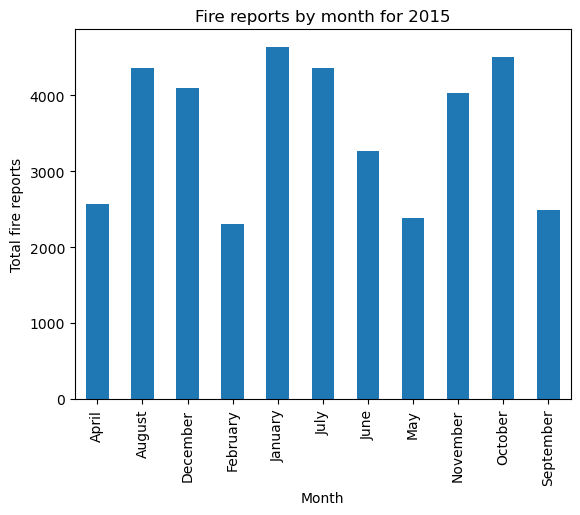

In [97]:
grouped = df.loc[df['year'] == 2015].groupby('month')['number'].sum()
grouped.plot(kind='bar')
m.xlabel('Month')
m.ylabel('Total fire reports')
m.title('Fire reports by month for 2015')
m.show()

In [100]:
grouped = df.groupby('state')['number'].mean().round(2)
grouped.sort_values(ascending=False)

state
Sao Paulo           213.90
Mato Grosso         201.35
Bahia               187.22
Piau                158.17
Goias               157.72
Minas Gerais        156.80
Tocantins           141.04
Amazonas            128.24
Ceara               127.31
Paraiba             109.70
Maranhao            105.14
Pará                102.56
Pernambuco          102.50
Roraima             102.03
Santa Catarina      101.92
Amapa                91.35
Rondonia             84.88
Acre                 77.26
Rio                  62.99
Espirito Santo       27.39
Alagoas              19.35
Distrito Federal     14.90
Sergipe              13.54
Name: number, dtype: float64

In [101]:
december_df = df[df['month'] == 'December']
december_df['state'].unique()


array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)